# INCLUDES ALL COLUMNS

C:\Users\Tamara\AppData\Local\Temp\ipykernel_21752\54126548.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(most_frequent, inplace=True)
C:\Users\Tamara\AppData\Local\Temp\ipykernel_21752\54126548.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Evaluating Logistic Regression...

Evaluating Decision Tree...

Evaluating Random Forest...
                     train_accuracy  train_precision  train_recall  \
Logistic Regression        0.975233         0.976109      0.975233   
Decision Tree              0.960956         0.960982      0.960956   
Random Forest              0.974650         0.974665      0.974650   

                     train_f1_score  train_roc_auc  test_accuracy  \
Logistic Regression        0.975229       0.996016       0.972028   
Decision Tree              0.960953       0.976744       0.944056   
Random Forest              0.974651       0.995251       0.965035   

                     test_precision  test_recall  test_f1_score  test_roc_auc  
Logistic Regression        0.973435     0.972028       0.971962      0.991889  
Decision Tree              0.944056     0.944056       0.944056      0.958156  
Random Forest              0.965057     0.965035       0.965025      0.992794  

Model: Logistic Regression


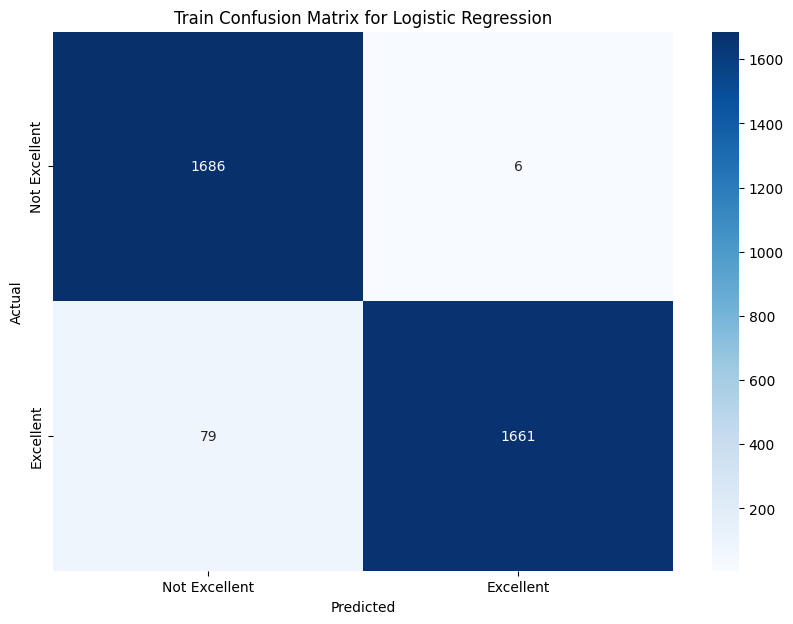

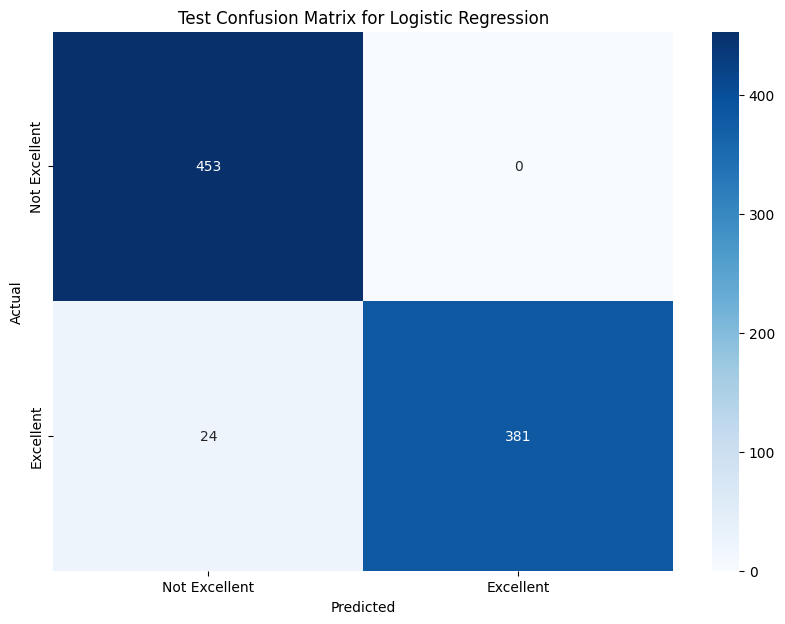

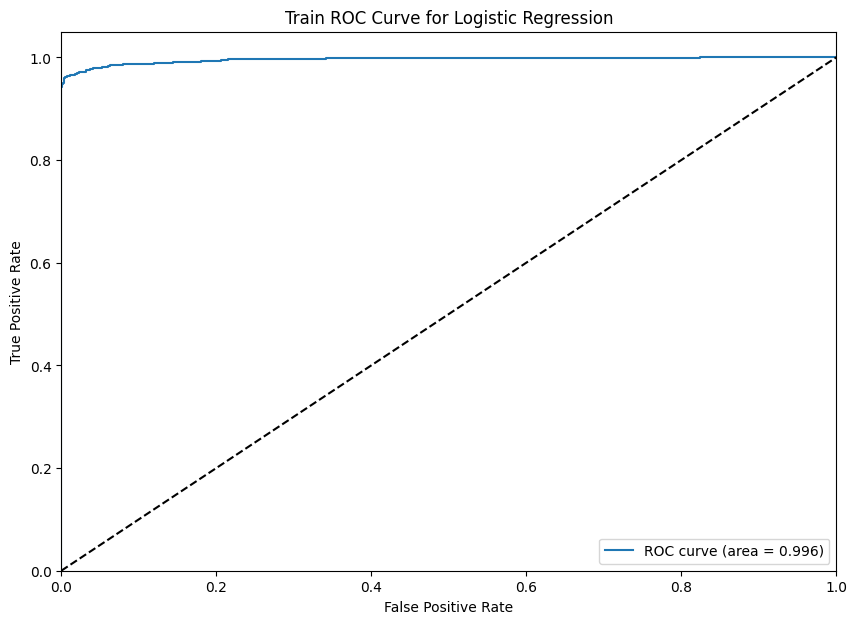

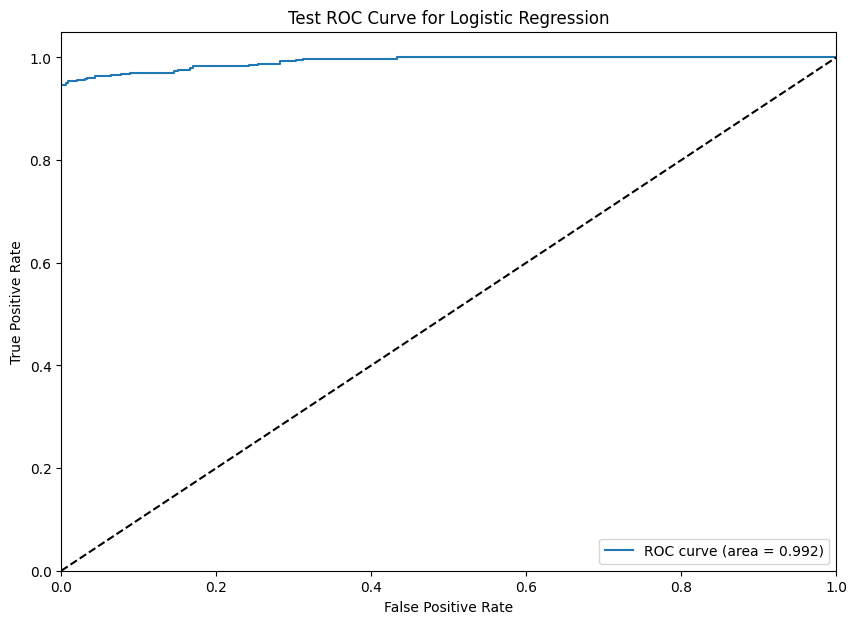


Model: Decision Tree


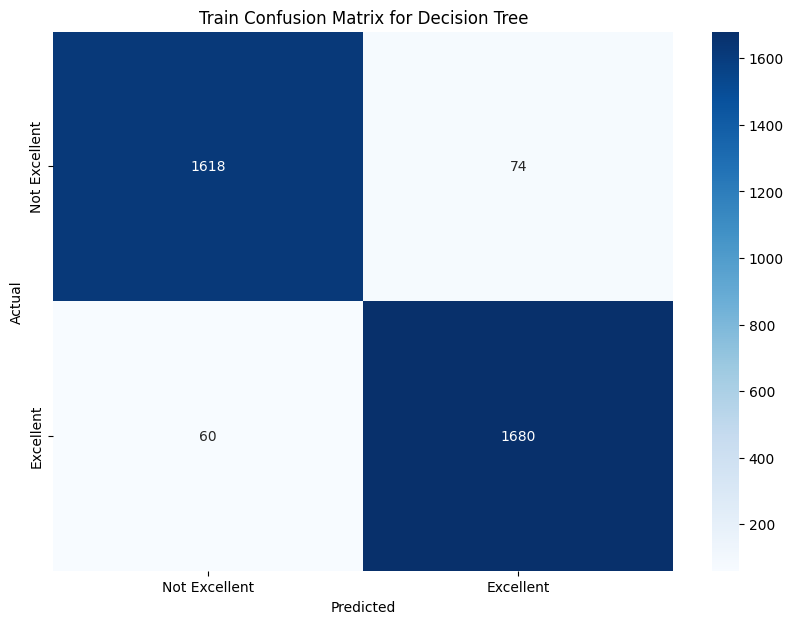

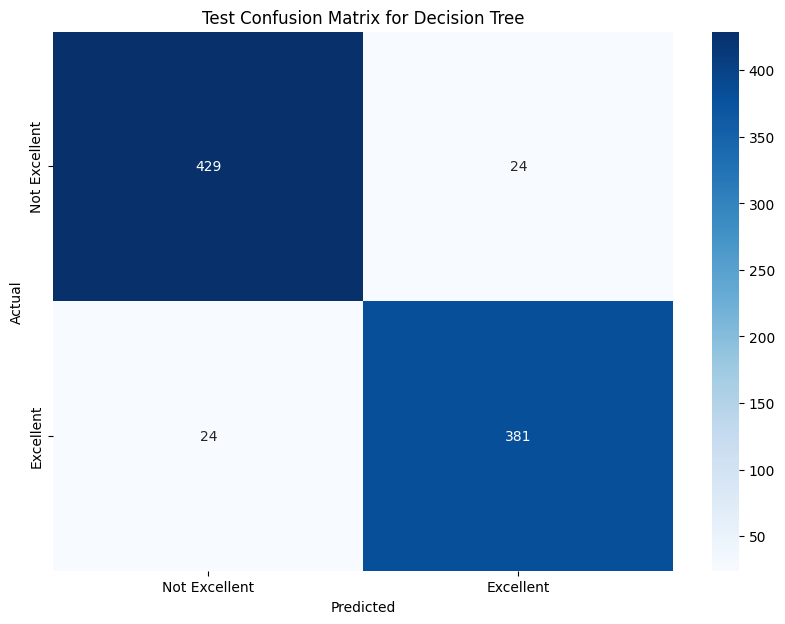

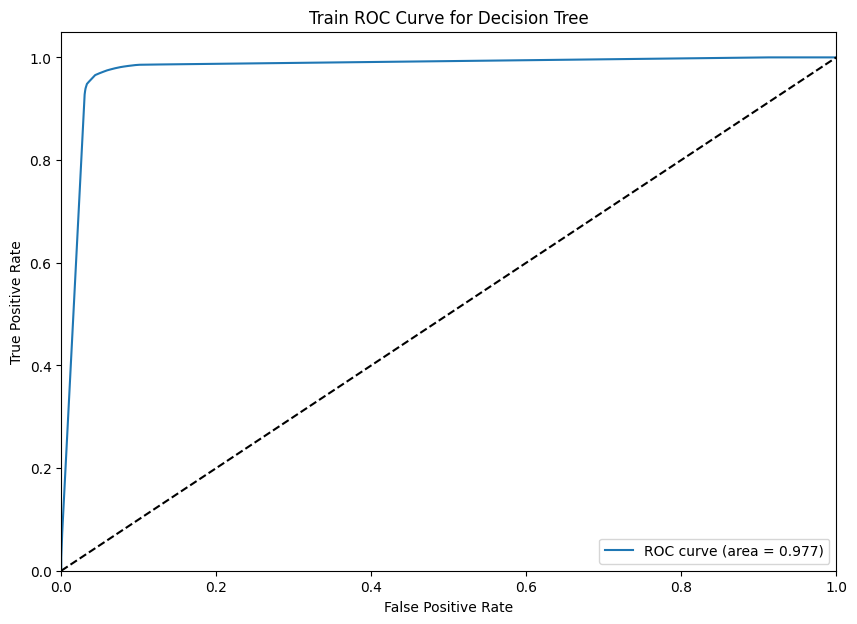

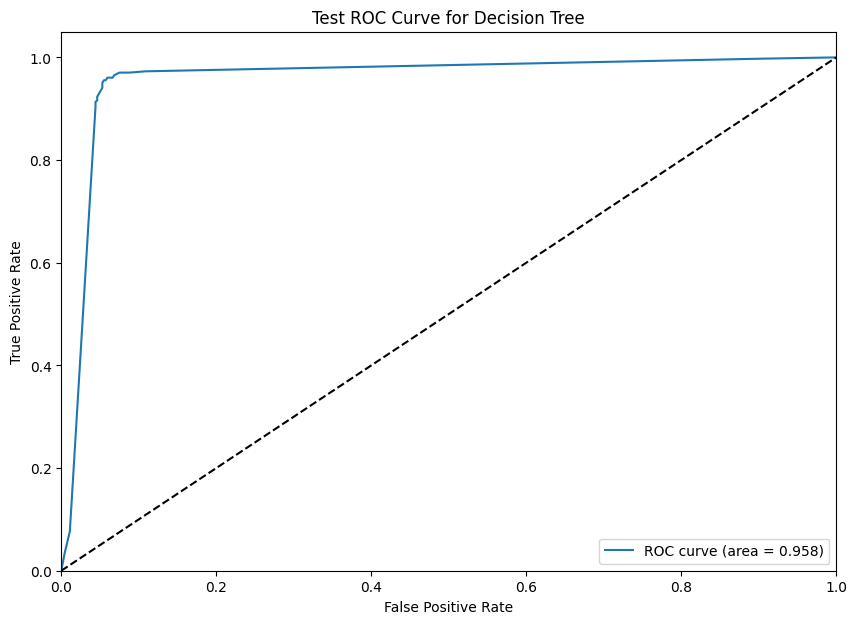


Model: Random Forest


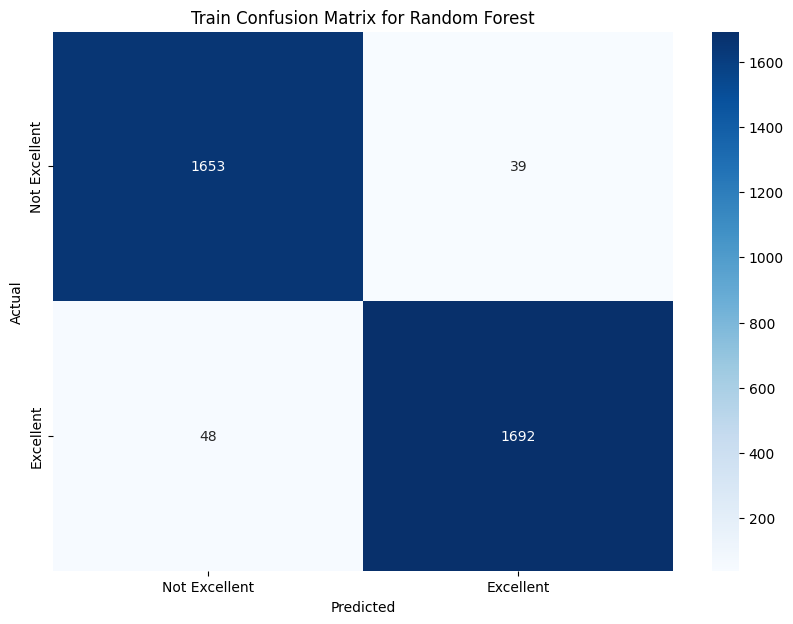

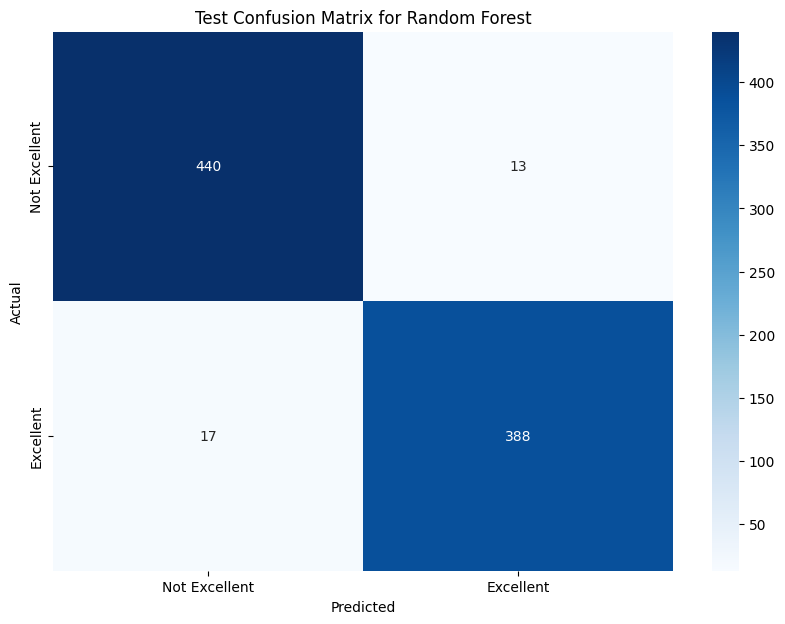

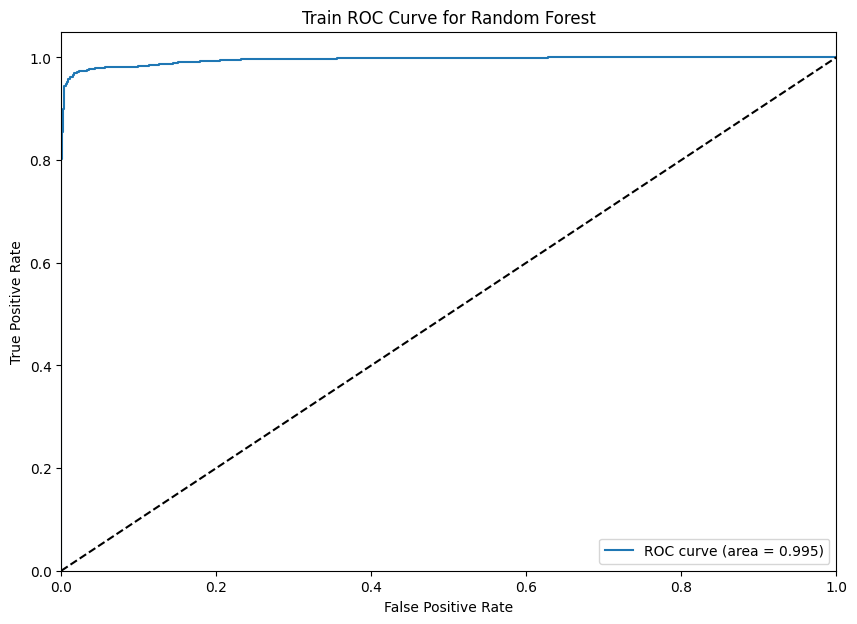

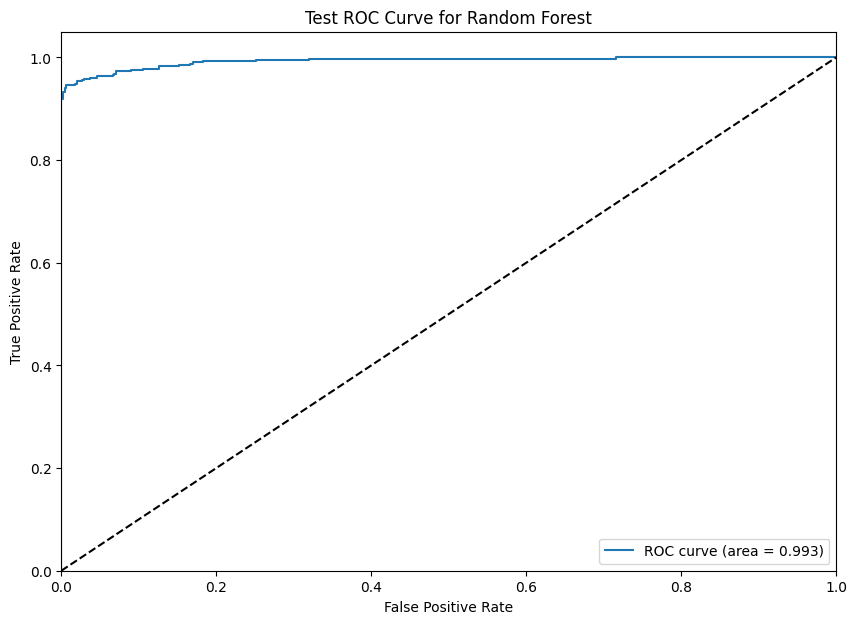


Top 10 coefficients for Logistic Regression:
                                         Feature  Coefficient
8                                  q2_Excellent     0.603581
1050  educ5_Post grad study/professional degree     0.307683
919                                hl003newa_No     0.269748
80                          q10a_Very satisfied     0.264357
162                          q19_Definitely yes     0.233204
157                          q17_Very confident     0.224191
617                        q52_Very comfortable     0.218751
526    q46i_No, and not interested in trying it     0.218018
767                          q69_Very satisfied     0.210833
684                                     q60c_No     0.205516


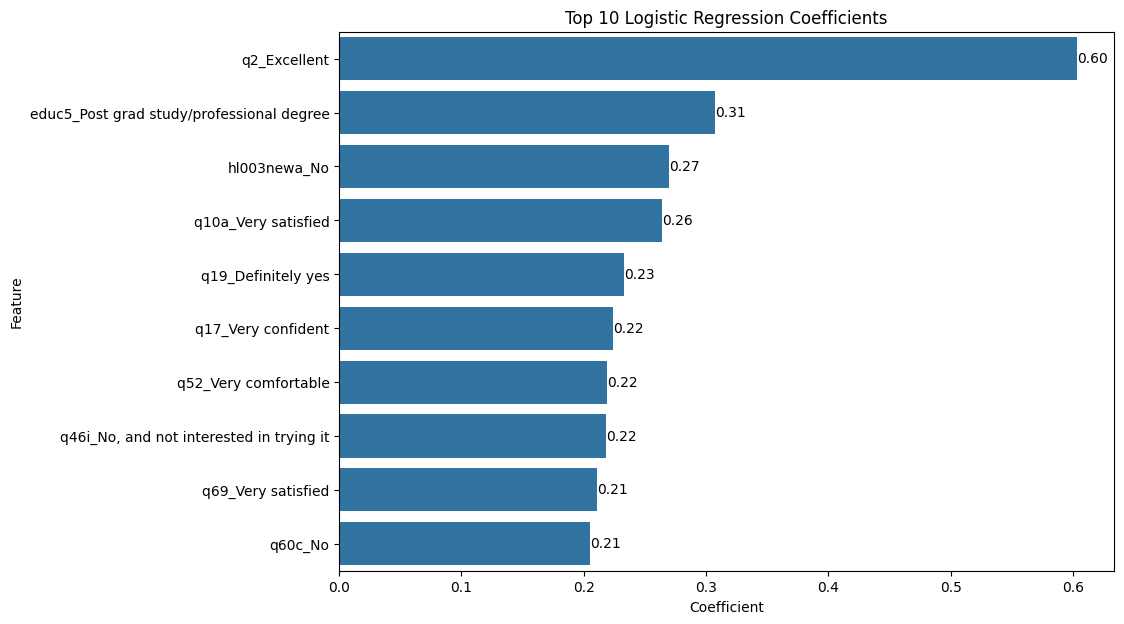


Top 10 feature importances for Decision Tree:
                      Feature  Importance
8               q2_Excellent    0.714370
919             hl003newa_No    0.079327
295                   q31_No    0.034006
59                     q6_No    0.031702
1158                state_ND    0.022563
162       q19_Definitely yes    0.018058
236       q24_SKIPPED ON WEB    0.013373
562         q48_4_Relaxation    0.012467
964            hl003newn_Yes    0.011372
771   q70_Somewhat satisfied    0.010339


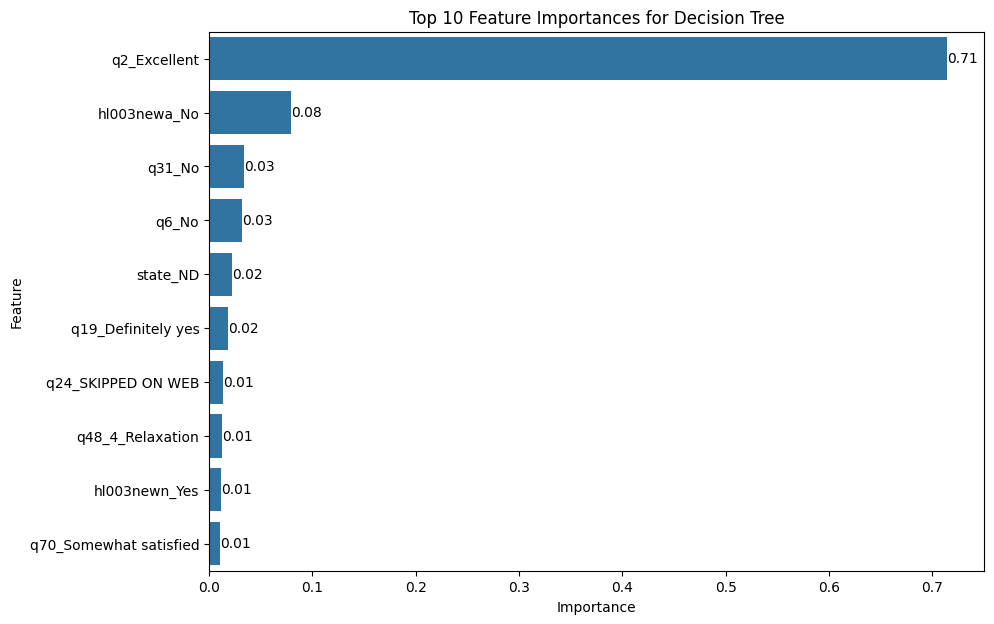


Top 10 feature importances for Random Forest:
                                         Feature  Importance
8                                  q2_Excellent    0.091442
1050  educ5_Post grad study/professional degree    0.049619
80                          q10a_Very satisfied    0.034332
919                                hl003newa_No    0.033613
157                          q17_Very confident    0.031156
315                                      q35_No    0.024538
59                                        q6_No    0.023027
364                                 q38_skp_Yes    0.022492
345                                    q38_3_No    0.021638
62                               q7_Hardly ever    0.020797


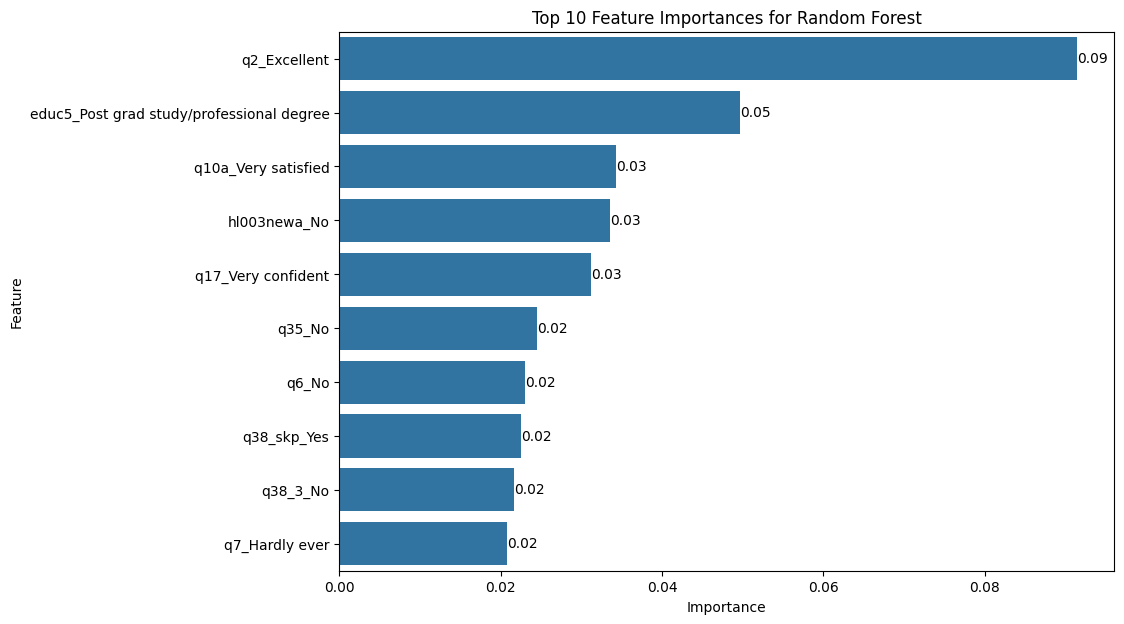

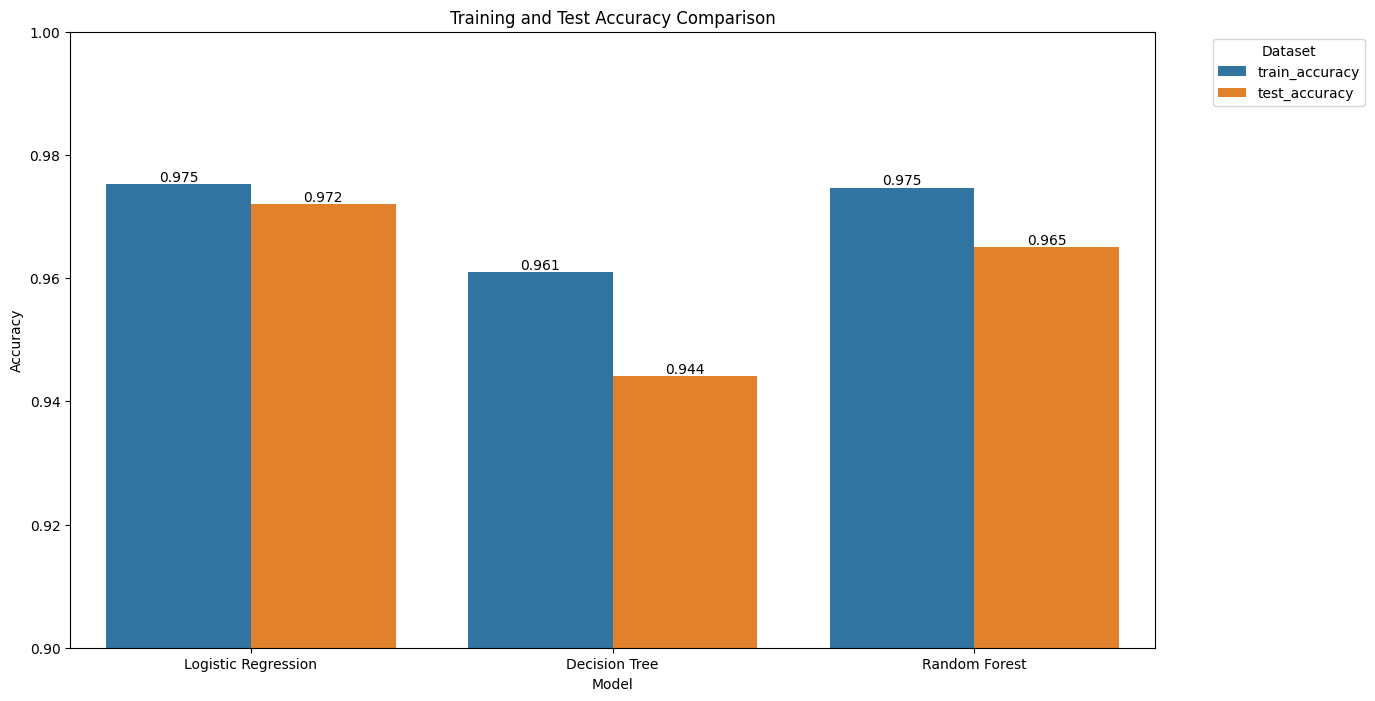

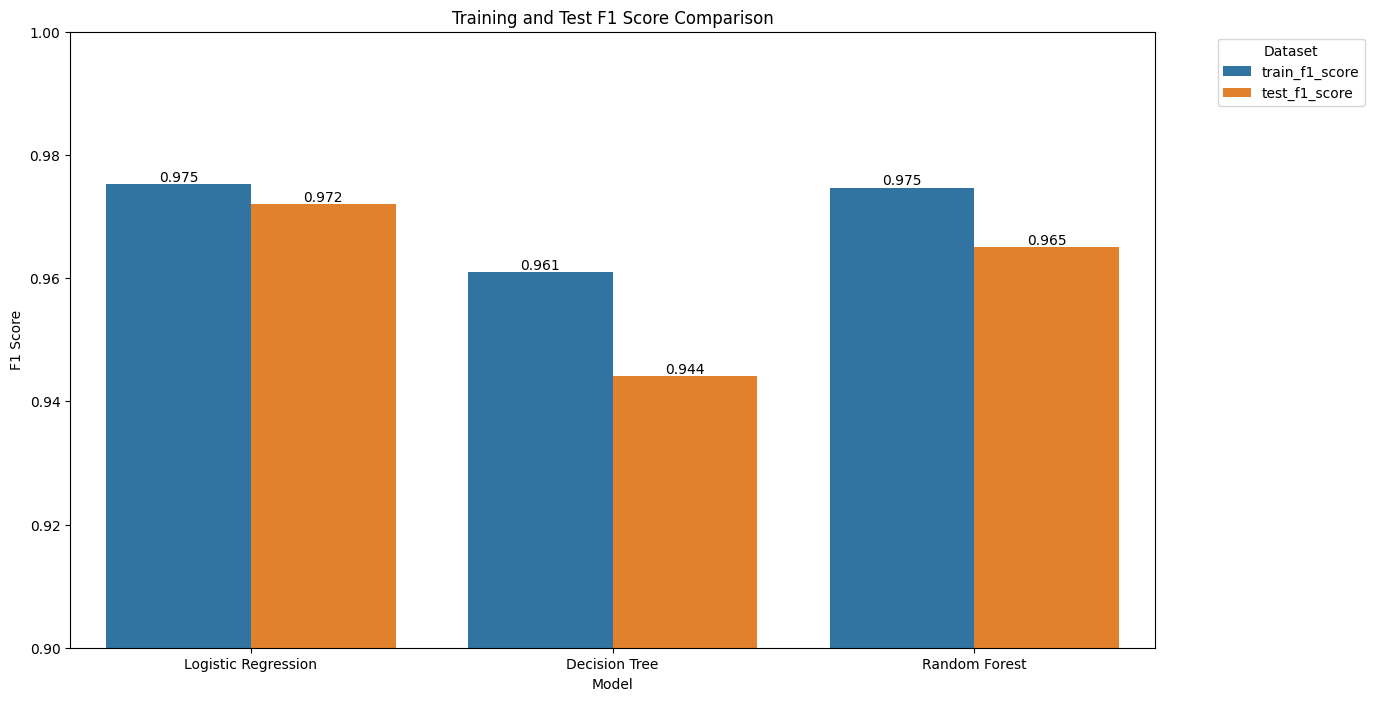

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Tamara\Documents\npha\NPHA_Wave10_January2022.csv'
data = pd.read_csv(file_path)

# Fill missing values for categorical variables with the mode
for column in data.select_dtypes(include=['object']).columns:
    if not data[column].mode().empty:
        most_frequent = data[column].mode().iloc[0]
        data[column].fillna(most_frequent, inplace=True)

# Fill missing values for numerical variables with the mean
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

# One-hot encoding
data_encoded = pd.get_dummies(data)

# Remove other q1 related variables after encoding
q1_columns = [col for col in data_encoded.columns if col.startswith('q1_') and col != 'q1_Excellent']
data_encoded.drop(columns=q1_columns, inplace=True)

# Remove columns ending with "_totaltime", the column "duration", and "caseid"
totaltime_columns = [col for col in data_encoded.columns if col.endswith('_totaltime')]
if 'duration' in data_encoded.columns:
    totaltime_columns.append('duration')
if 'caseid' in data_encoded.columns:
    totaltime_columns.append('caseid')
data_encoded.drop(columns=totaltime_columns, inplace=True)

# Define X and y
X = data_encoded.drop(columns=['q1_Excellent'])
y = data_encoded['q1_Excellent']

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [2, 3, 4, 5, 6],
        'min_samples_split': [10, 20, 30, 40, 50],
        'min_samples_leaf': [10, 20, 30, 40, 50]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [2, 3, 4, 5, 6],
        'min_samples_split': [10, 20, 30, 40, 50],
        'min_samples_leaf': [10, 20, 30, 40, 50]
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Evaluate each model with cross-validation and hyperparameter tuning
def evaluate_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Initialize dictionary to store the best estimators
best_estimators = {}

# Evaluate each model and store the best estimator
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    best_estimators[name] = evaluate_model(model, param_grids[name], X_train, y_train)

# Train and evaluate the best estimators on both train and test data
results = {}
for name, model in best_estimators.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results[name] = {
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'train_precision': precision_score(y_train, y_train_pred, average='weighted'),
        'train_recall': recall_score(y_train, y_train_pred, average='weighted'),
        'train_f1_score': f1_score(y_train, y_train_pred, average='weighted'),
        'train_roc_auc': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]) if hasattr(model, "predict_proba") else None,
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted'),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted'),
        'test_f1_score': f1_score(y_test, y_test_pred, average='weighted'),
        'test_roc_auc': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if hasattr(model, "predict_proba") else None
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, labels):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_true, y_proba):.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Define labels for confusion matrix
labels = ['Not Excellent', 'Excellent']

# Plot confusion matrix and ROC curve for each model on train and test data
for name, model in best_estimators.items():
    print(f"\nModel: {name}")
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Plot confusion matrices
    plot_confusion_matrix(y_train, y_train_pred, f'Train Confusion Matrix for {name}', labels)
    plot_confusion_matrix(y_test, y_test_pred, f'Test Confusion Matrix for {name}', labels)

    if hasattr(model, "predict_proba"):
        y_train_proba = model.predict_proba(X_train)[:, 1]
        y_test_proba = model.predict_proba(X_test)[:, 1]

        # Plot ROC curves
        plot_roc_curve(y_train, y_train_proba, f'Train ROC Curve for {name}')
        plot_roc_curve(y_test, y_test_proba, f'Test ROC Curve for {name}')
    else:
        print(f"The model {name} does not support predict_proba method.")

# Plot feature importance for Decision Tree and Random Forest
for name, model in best_estimators.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        features_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False).head(10)
        print(f"\nTop 10 feature importances for {name}:\n", features_df)
        plt.figure(figsize=(10, 7))
        sns.barplot(x='Importance', y='Feature', data=features_df)
        plt.title(f'Top 10 Feature Importances for {name}')
        for i, v in enumerate(features_df['Importance']):
            plt.text(v, i, f"{v:.2f}", va='center')
        plt.show()
    elif name == 'Logistic Regression':
        coefficients = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': model.coef_[0]
        }).sort_values(by='Coefficient', ascending=False).head(10)
        print(f"\nTop 10 coefficients for {name}:\n", coefficients)
        plt.figure(figsize=(10, 7))
        sns.barplot(x='Coefficient', y='Feature', data=coefficients)
        plt.title('Top 10 Logistic Regression Coefficients')
        for i, v in enumerate(coefficients['Coefficient']):
            plt.text(v, i, f"{v:.2f}", va='center')
        plt.show()

# Plot accuracy comparison
accuracy_df = results_df[['train_accuracy', 'test_accuracy']].reset_index().melt(id_vars='index')
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='index', y='value', hue='variable', data=accuracy_df)
plt.title('Training and Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)  # Set y-axis to start at 0.9
plt.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.2, 1))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

# Plot F1 score comparison
f1_score_df = results_df[['train_f1_score', 'test_f1_score']].reset_index().melt(id_vars='index')
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='index', y='value', hue='variable', data=f1_score_df)
plt.title('Training and Test F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0.9, 1)  # Set y-axis to start at 0.9
plt.legend(title='Dataset', loc='upper right', bbox_to_anchor=(1.2, 1))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()
